In [1]:
import numpy as np
import pulser
from matplotlib import pyplot as plt

# $|g> \to |r>$ Transition
Go from ground state to Rydberg state after time $\Delta t$.

In [2]:
device = pulser.AnalogDevice
print(device.specs)

A realistic device for analog sequence execution.

Register parameters:
 - Dimensions: 2D
 - Maximum number of atoms: 80
 - Maximum distance from origin: 38 µm
 - Minimum distance between neighbouring atoms: 5 μm

Layout parameters:
 - Requires layout: Yes
 - Accepts new layout: Yes
 - Minimal number of traps: 1
 - Maximum layout filling fraction: 0.5

Device parameters:
 - Rydberg level: 60
 - Ising interaction coefficient: 865723.02
 - Channels can be reused: No
 - Supported bases: ground-rydberg
 - Supported states: r, g
 - SLM Mask: No
 - Maximum sequence duration: 6000 ns
 - Maximum number of runs: 2000

Channels:
 - 'rydberg_global': Rydberg(addressing='Global', max_abs_detuning=125.66370614359172, max_amp=12.566370614359172, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=100000000, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=RydbergEOM(limiting_beam=<RydbergBeam.RED: 2>, max_limiting_

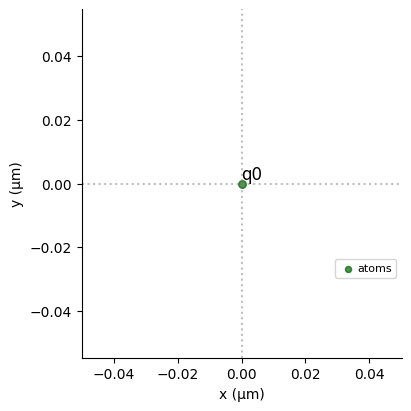

In [4]:
register = pulser.Register.from_coordinates([(0, 0)], prefix="q")
register.draw()

In [5]:
sequence = pulser.Sequence(register, device) # checks if the register is compatible with the device

In [6]:
sequence.declare_channel("rydberg_global", "rydberg_global")
print(
    "The states used in the computation are", sequence.get_addressed_states()
)

The states used in the computation are ['r', 'g']


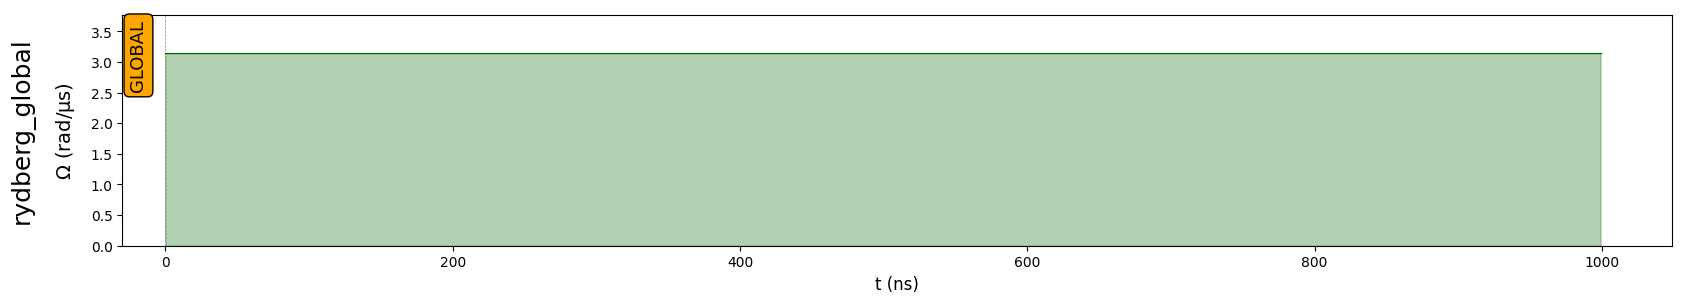

In [7]:
pi_pulse = pulser.Pulse.ConstantPulse(1000, np.pi, 0, 0)
sequence.add(pi_pulse, "rydberg_global")
sequence.draw(mode="input")

In [8]:
backend = pulser.backends.QutipBackend(sequence)
result = backend.run()

In [9]:
result.sample_final_state(1000)

Counter({'1': 1000})